# 🧮 Cálculo del Determinante

En esta lección aprenderás a **calcular determinantes** de matrices de tamaño:

- $2\times 2$  
- $3\times 3$  
- $n\times n$

Usaremos métodos algebraicos (Sarrus, cofactores) y métodos computacionales (NumPy, SymPy).  
Además, verás cómo aplicar **propiedades del determinante** para simplificar cálculos.

---

# 1. 📐 Determinantes $2\times 2$

El caso más simple:

$$
A = \begin{pmatrix}
a & b \\
c & d
\end{pmatrix}
$$

$$
\det(A) = ad - bc.
$$

---

## 💡 Ejemplo

$$
A=\begin{pmatrix}
3 & 5 \\
2 & 1
\end{pmatrix}
$$

$$
\det(A)=3(1)-5(2)=3-10=-7.
$$

---

## 💻 Código

In [1]:
import numpy as np

A = np.array([[3,5],
              [2,1]])

np.linalg.det(A)

np.float64(-6.999999999999999)

---

# 2. 📐 Determinantes (3\times 3)

Para matrices de (3\times 3):

$$
A =
\begin{pmatrix}
a & b & c\
d & e & f\
g & h & i
\end{pmatrix}
$$

## 🔹 Regla de Sarrus (solo 3×3)

$$
\det(A)=a(ei - fh) - b(di - fg) + c(df - eg)
$$

---

## 💡 Ejemplo

$$
A=
\begin{pmatrix}
1 & 2 & 3 \
0 & 1 & 4 \
5 & 6 & 0
\end{pmatrix}
$$

$$
\det(A)=1(1\cdot 0 - 4\cdot 6)
-2(0\cdot 0 - 4\cdot 5)
+3(0\cdot 6 - 1\cdot 5)
$$

$$
=-24 + 40 - 15 = 1.
$$

---

## 💻 Código

In [2]:
A = np.array([[1,2,3],
              [0,1,4],
              [5,6,0]])

np.linalg.det(A)

np.float64(0.9999999999999964)


---

# 3. 🔍 Cofactores y expansión por filas/columnas

La definición general del determinante se basa en **expansión por cofactores**:

Para una fila $i$:

$$
\det(A) = \sum_{j=1}^{n} (-1)^{i+j} a_{ij} M_{ij}
$$

donde:

* $M_{ij}$ = determinante del menor (submatriz que resulta de eliminar fila $i$ y columna $j$).

---

## 💡 Ejemplo 3×3 expandiendo por la primera fila

$$
A=
\begin{pmatrix}
2 & 1 & -1 \
3 & 0 & 4 \
1 & -2 & 5
\end{pmatrix}
$$

$$
\det(A)= 2\begin{vmatrix} 0 & 4 \ -2 & 5 \end{vmatrix}

* 1\begin{vmatrix} 3 & 4 \ 1 & 5 \end{vmatrix}
  -1\begin{vmatrix} 3 & 0 \ 1 & -2 \end{vmatrix}
  $$

Calculando menores:

* $2[(0)(5)-4(-2)] = 2(8)=16$
* $-1[(3)(5)-4(1)]= -1(11)= -11$
* $-1[(3)(-2)-0(1)] = -1(-6)=6$

$$
\det(A)=16 -11 +6 = 11.
$$

---

# 4. 🔧 Uso de propiedades para facilitar el cálculo

Las propiedades del determinante permiten simplificar cálculos difíciles.

### ✔️ Propiedad 1: Factor común en una fila o columna

Si una fila tiene un factor (k), se puede sacar:

$$
\det(k \cdot \text{fila}_i) = k \cdot \det(A)
$$

### ✔️ Propiedad 2: Si dos filas son iguales → determinante = 0

### ✔️ Propiedad 3: Si una fila es combinación lineal de otras → determinante = 0

### ✔️ Propiedad 4: Sumar un múltiplo de una fila a otra **no cambia** el determinante

### ✔️ Propiedad 5: Matriz triangular

$$
\det(A) = \prod_{i=1}^n a_{ii}
$$

Gran ahorro computacional.

---

## 💡 Ejemplo usando propiedades

$$
A=
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
\end{pmatrix}
$$

La fila 3 = fila 1 + fila 2 → determinante = 0.

---

# 5. 🧮 Determinantes en dimensión (n): definición general

Para $n>3$, solo dos métodos son prácticos:

### ✔️ Expansión por cofactores (costoso)

Complejidad $O(n!)$.
Solo útil para matrices pequeñas o con muchos ceros.

### ✔️ Reducción por filas

Usando operaciones elementales que conservan o modifican el determinante de forma controlada.

Al convertir $A$ en matriz triangular (U):

$$
\det(A) = (\pm 1), \prod_{i=1}^n u_{ii}
$$

El signo depende de los intercambios de filas.

---

# 6. 💻 Cálculo computacional con Python

## Con NumPy

In [3]:
import numpy as np
A = np.random.randint(-5,5,(5,5))

np.linalg.det(A)

np.float64(-719.9999999999995)


---

## Con SymPy (cálculo exacto)

In [4]:
import sympy as sp

A = sp.Matrix([
    [1,2,3,4],
    [0,1,2,3],
    [5,6,7,8],
    [1,0,0,1]
])

A.det()

0


---

# 7. 🧰 Implementaciones reusables

In [5]:
import numpy as np

def det_2x2(A):
    """Determinante de matriz 2x2"""
    a,b = A[0]
    c,d = A[1]
    return a*d - b*c

def det_cofactores(A):
    """Calcula determinante recursivamente vía cofactores."""
    A = np.array(A, dtype=float)
    n = A.shape[0]
    
    if n == 1:
        return A[0,0]
    if n == 2:
        return det_2x2(A)
    
    det = 0
    for j in range(n):
        sub = np.delete(np.delete(A, 0, axis=0), j, axis=1)
        det += ((-1)**j) * A[0,j] * det_cofactores(sub)
    return det


---

# 8. 🎨 Visualización del determinante

### 2D: paralelogramo

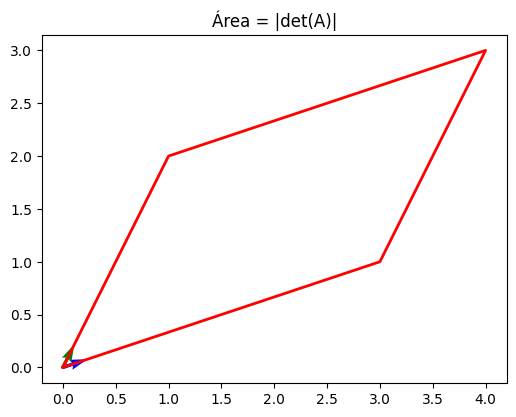

In [7]:
import matplotlib.pyplot as plt

A = np.array([[3,1],
              [1,2]])

v1 = A[:,0]
v2 = A[:,1]

P = np.array([[0,0],v1,v1+v2,v2,[0,0]])

plt.figure(figsize=(6,6))
plt.plot(P[:,0],P[:,1],'r-',linewidth=2)
plt.quiver(0,0,v1[0],v1[1],color='blue')
plt.quiver(0,0,v2[0],v2[1],color='green')
plt.gca().set_aspect('equal')
plt.title("Área = |det(A)|")
plt.show()

---

# 9. 🧩 Ejercicios sugeridos

### **1. Implementa la regla de Sarrus**

Construye una función:

In [ ]:
def det_3x3_sarrus(A):
    pass

y compara con `np.linalg.det`.

---

### **2. Implementa expansión por cofactores**

Para matrices 3×3 y 4×4.

---

### **3. Exploración aleatoria**

Genera matrices 5×5 aleatorias y compara tiempos:

* NumPy
* SymPy
* implementación recursiva

---

### **4. Simplificación usando propiedades**

Da una matriz grande con ceros estructurados y simplifica el cálculo manualmente usando propiedades.

---

### **5. Determinante de matriz triangular**

Genera matrices triangulares y verifica que el determinante es el producto de la diagonal.

---

# 📚 Conclusión

Calcular determinantes no es solo aplicar fórmulas:
es comprender cómo una matriz transforma el espacio, escala volúmenes, y cómo sus propiedades internas se reflejan en su estructura.

Este capítulo te prepara para usar el determinante como herramienta poderosa en teoría y aplicación.

> “Calcular un determinante es leer la huella digital de una transformación lineal.”

---

👉 **Siguiente tema:** `determinantes/propiedades.ipynb`
